# TITLE :- movie recommendation system

There are 4 types of recommender system :-
1) Popularity based
    
   It is a type of recommendation system which works on the principle of popularity and or anything which is in trend. These systems check about the product or movie which are in trend or are most popular among the users and directly recommend those.
   
2) content based
   
   It is another type of recommendation system which works on the principle of similar content. If a user is watching a movie, then the system will check about other movies of similar content or the same genre of the movie the user is watching. There are various fundamentals attributes that are used to compute the similarity while checking about similar content.  
   (based on content similarity)

3) collaberative filtering type 
   
   It is considered to be one of the very smart recommender systems that work on the similarity between different users and also items that are widely used as an e-commerce website and also online movie websites. It checks about the taste of similar users and does recommendations.
   (based on user similarity)

4) hybrid based 
   Hybrid Recommendation systems are combining collaborative and content-based recommendation can be more effective. Hybrid approaches can be implemented by making content-based and collaborative-based predictions separately and then combining them.

## Problem Statement

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
mov = pd.read_csv("D:\\project 3 recommendation system\\tmdb_5000_movies.csv")
mov.head(1) # importing first data set using pandas.

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [3]:
credit = pd.read_csv("D:\\project 3 recommendation system\\tmdb_5000_credits.csv")
credit.head(1) # importing second data set using pandas.

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [4]:
# we need data from both the dataframe so merging both the dataframes.
data = mov.merge(credit, on = "title")
data.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [5]:
credit.shape

(4803, 4)

In [6]:
mov.shape

(4803, 20)

In [7]:
data.shape  ## total 20 + 4 is 24 but only 23 is showing because both datasets are merged on title column which is same in both.

(4809, 23)

In [8]:
data.info() ## checking for informaion of the Data frame.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [9]:
# column which are important
# 1) Genre :- as same genre lead to recommendation
# 2) id :- this can be used in deployment part so we are keeping it for now. 
# 3) keywords :- this are nothing but tag and this is important
# 4) title :- `we are not keeping original title as it can be in any other language
# 5) overview :- synopsis hai ye 
# 6) cast :- this is very  important as we can recommend on the basis of actor actress.
# 7) crew :- it is very easy to recommend the movie ased on the director. 

In [10]:
df = data[["genres","id","keywords","title","overview","cast","crew"]] # keeping usefull data.
df

,genres,id,keywords,title,overview,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",John Carter,"John Carter is a war-weary, former military ca...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4804,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",El Mariachi,El Mariachi just wants to play his guitar and ...,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4805,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],Newlyweds,A newlywed couple's honeymoon is upended by th...,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4806,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4807,[],126186,[],Shanghai Calling,When ambitious New York attorney Sam is sent t...,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


## EDA and preprocessing

In [11]:
## checking for missing values
df.isna().sum()  

genres      0
id          0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [12]:
df.dropna(inplace = True) ## overview has only 3 missing values so we can del the rows.

In [13]:
## checking for duplicate rows
df.duplicated().sum()              ## no duplicate values are present.

0

In [14]:
# For genre , here we are seeing the string format which has list of dictionary, therefore need to simplify fisrt.
df.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [15]:
import ast

In [16]:
# '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"},{"id": 14, "name": "Fantasy"},
#{"id": 878, "name": "Science Fiction"}]'   

def convert1(l):
    d = []
    for a in ast.literal_eval(l): # as the dict is in string format we cannot use dict functions directly
        d.append(a["name"])       # we need to use the ast.literal_eval function for converting it to dict.
    return d


In [17]:
df.genres.apply(convert1)  ## applying user defined function to Dataframe.

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4804                        [Action, Crime, Thriller]
4805                                [Comedy, Romance]
4806               [Comedy, Drama, Romance, TV Movie]
4807                                               []
4808                                    [Documentary]
Name: genres, Length: 4806, dtype: object

In [18]:
df["genres"] = df.genres.apply(convert1) ## replacing old column with new data.

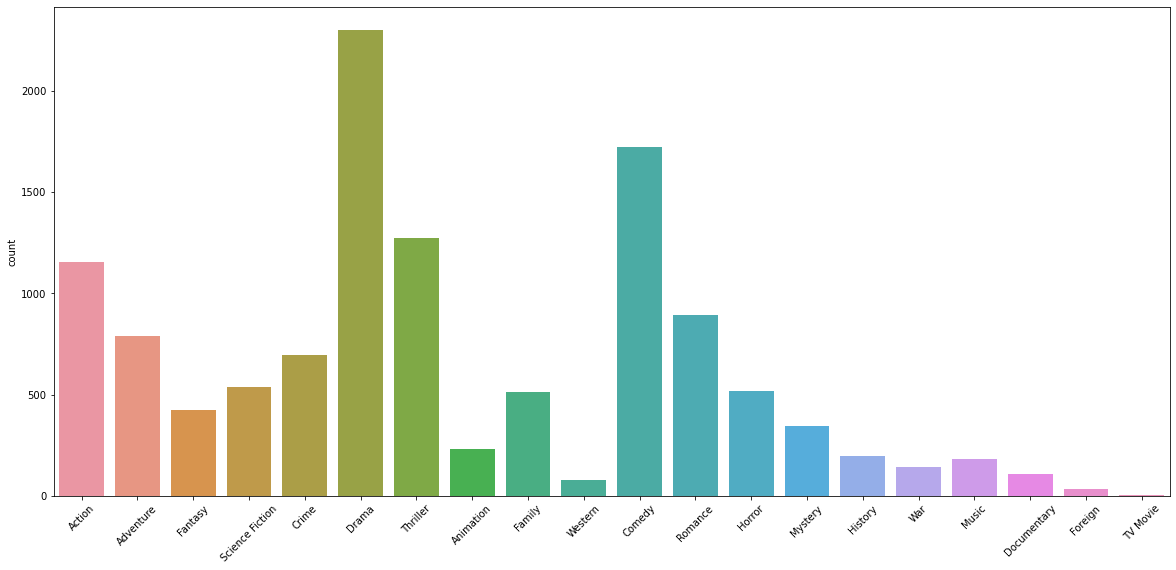

In [19]:
# for count of the Genres.
def max_genres(data,column):
    plt.figure(figsize=(20,9))
    l = []
    for a in data[column]:
        for b in a:
            l.append(b)
    sns.countplot(l)
    plt.xticks(rotation = 45)
    plt.show()
max_genres(df,"genres")

In [20]:
df.head(3)  ## genre is simplified.

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [21]:
## we have to do same for keyyword also
df.keywords[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [22]:
df.keywords.apply(convert1)

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4804    [united states–mexico barrier, legs, arms, pap...
4805                                                   []
4806    [date, love at first sight, narration, investi...
4807                                                   []
4808            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4806, dtype: object

In [23]:
df.keywords = df.keywords.apply(convert1)

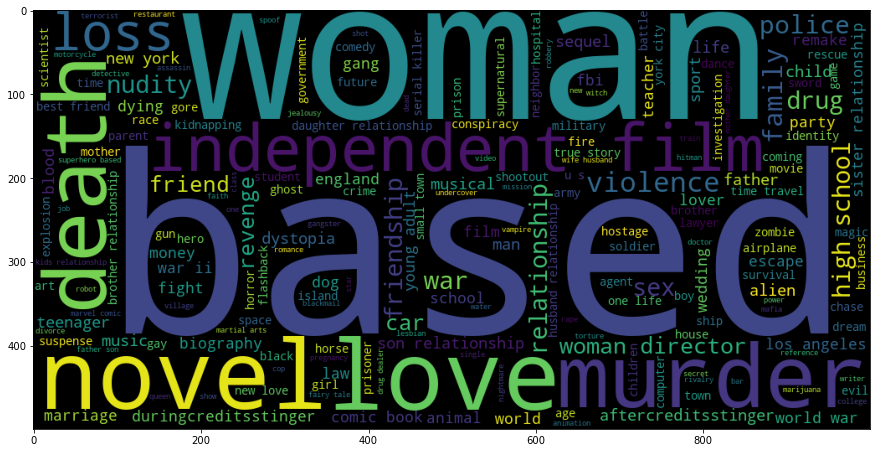

In [24]:
#convert list to string and generate
def wordcloud(data,column):
    string = ""
    for a in data[column]:
        unique_string=(" ").join(a)
        string += unique_string
    wordcloud = WordCloud(width = 1000, height = 500).generate(string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.show()
    plt.close()
wordcloud(df,"keywords")

In [25]:
df.head(3) 

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [26]:
df.cast[0]  ## here we dont want everything we just wants starting 3 of every dict.

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [27]:
 def convert1(l):
    count = 0
    d = []
    for a in ast.literal_eval(l):
        if count != 3:                  ## for starting 3 only. if increase greater than 3 then break.
            d.append(a["name"])
            count += 1
        else:
            break
    return d

In [28]:
df.cast.apply(convert1)

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4804    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4805         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4806           [Eric Mabius, Kristin Booth, Crystal Lowe]
4807            [Daniel Henney, Eliza Coupe, Bill Paxton]
4808    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4806, dtype: object

In [29]:
df.cast = df.cast.apply(convert1)

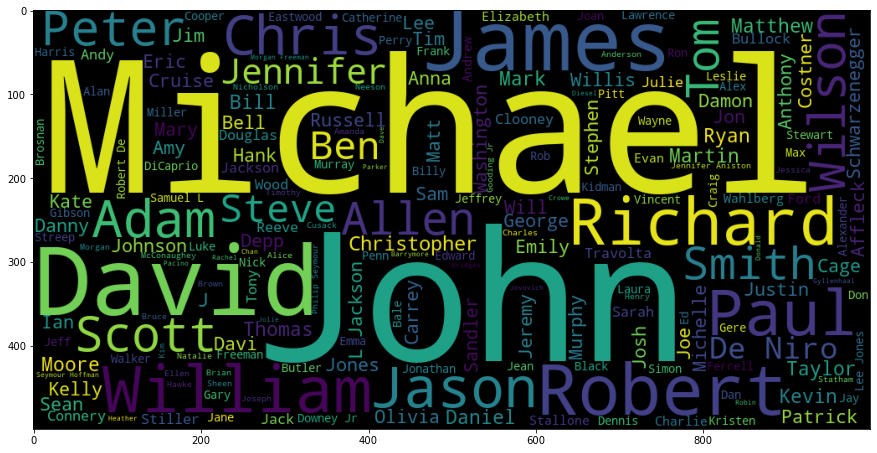

In [30]:
#convert list to string and generate
def wordcloud(data,column):
    string = ""
    for a in data[column]:
        unique_string=(" ").join(a)
        string += unique_string
    wordcloud = WordCloud(width = 1000, height = 500).generate(string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.show()
    plt.close()
wordcloud(df,"cast")

In [31]:
df.head(3)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [32]:
df.crew[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [33]:
## for director
def director(l):
    d = []
    for a in ast.literal_eval(l):
        if a["job"] == "Director":  ## we need only director name .
            d.append(a["name"])
            break
    return d

In [34]:
df.crew.apply(director)

0           [James Cameron]
1          [Gore Verbinski]
2              [Sam Mendes]
3       [Christopher Nolan]
4          [Andrew Stanton]
               ...         
4804     [Robert Rodriguez]
4805         [Edward Burns]
4806          [Scott Smith]
4807          [Daniel Hsia]
4808     [Brian Herzlinger]
Name: crew, Length: 4806, dtype: object

In [35]:
df.crew = df.crew.apply(director)

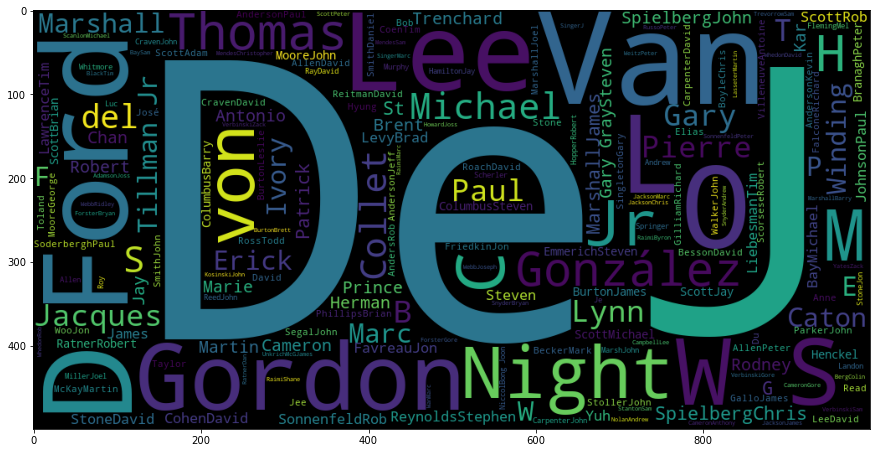

In [36]:
# for worcloud of crew
def wordcloud(data,column):
    string = ""
    for a in data[column]:
        unique_string=(" ").join(a)
        string += unique_string
    wordcloud = WordCloud(width = 1000, height = 500).generate(string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.show()
    plt.close()
wordcloud(df,"crew")

In [37]:
df.head(3)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,A cryptic message from Bond’s past sends him o...,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


In [38]:
df.overview[8]

"As Harry begins his sixth year at Hogwarts, he discovers an old book marked as 'Property of the Half-Blood Prince', and begins to learn more about Lord Voldemort's dark past."

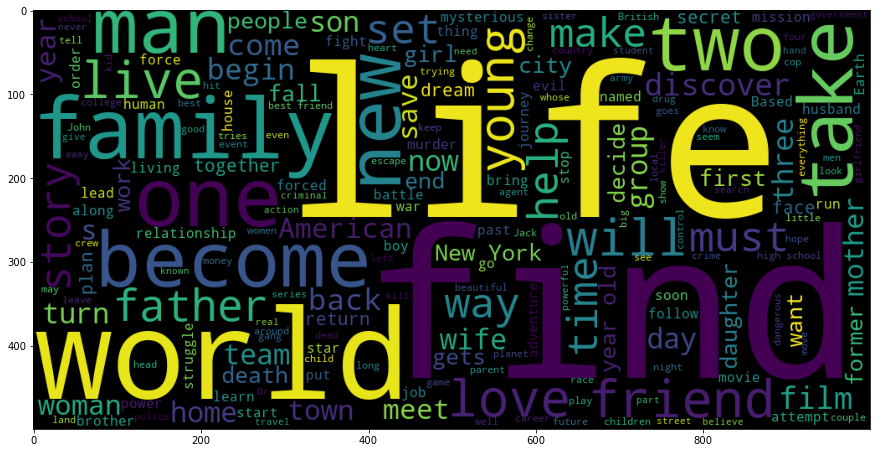

In [39]:
def wordcloud(data,column):  ## need to gve all data at once in large string
    df = data[column].str.cat(sep=' ') ## create large string with \n in it
    text = " ".join([word for word in df.split() ])  # removes \n from it

    word_cloud = WordCloud(width=1000,height=500).generate(text)
    plt.figure(figsize=(15,8))
    plt.imshow(word_cloud)
    plt.show()
wordcloud(df,"overview") 

## Feature engineering

In [40]:
# now we have to combine all list of columns and make one list but overview is in sring so we convert that to list.

In [41]:
df.overview = df.overview.apply(lambda x:x.split())

In [42]:
df.head(3)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]


In [43]:
# removing spaces of words in element to avoid confusion. like ankit dhanore and ankit sharma.
df.genres = df.genres.apply(lambda x:[i.replace(" ","") for i in x])
df.keywords = df.keywords.apply(lambda x:[i.replace(" ","") for i in x])
df.crew = df.crew.apply(lambda x:[i.replace(" ","") for i in x])
df.cast = df.cast.apply(lambda x:[i.replace(" ","") for i in x])

In [44]:
df.head(3)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]


In [45]:
# combining all columns and making one combined column.
df["tags"] = df.overview + df.genres + df.keywords + df.cast + df.crew

In [46]:
df.head(3)

,genres,id,keywords,title,overview,cast,crew,tags
0,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"[cultureclash, future, spacewar, spacecolony, ...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,"[Adventure, Fantasy, Action]",285,"[ocean, drugabuse, exoticisland, eastindiatrad...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,"[Action, Adventure, Crime]",206647,"[spy, basedonnovel, secretagent, sequel, mi6, ...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."


In [47]:
df_new = df[["id","title","tags"]] ## selecting usefull column.

In [48]:
df_new.head(5)

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [49]:
df_new.tags.apply(lambda x:" ".join(x))  # converting it back to string.

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4804    El Mariachi just wants to play his guitar and ...
4805    A newlywed couple's honeymoon is upended by th...
4806    "Signed, Sealed, Delivered" introduces a dedic...
4807    When ambitious New York attorney Sam is sent t...
4808    Ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

In [50]:
df_new.tags = df_new.tags.apply(lambda x:" ".join(x))  ## saving it to original dataframe

In [51]:
df_new

,id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."
...,...,...,...
4804,9367,El Mariachi,El Mariachi just wants to play his guitar and ...
4805,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...
4806,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic..."
4807,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...


In [52]:
df_new.tags.apply(lambda x:x.lower()) ## making all characters into lowercase.

0       in the 22nd century, a paraplegic marine is di...
1       captain barbossa, long believed to be dead, ha...
2       a cryptic message from bond’s past sends him o...
3       following the death of district attorney harve...
4       john carter is a war-weary, former military ca...
                              ...                        
4804    el mariachi just wants to play his guitar and ...
4805    a newlywed couple's honeymoon is upended by th...
4806    "signed, sealed, delivered" introduces a dedic...
4807    when ambitious new york attorney sam is sent t...
4808    ever since the second grade when he first saw ...
Name: tags, Length: 4806, dtype: object

In [53]:
df_new.tags = df_new.tags.apply(lambda x:x.lower()) # saving it to original dataframe

In [54]:
df_new.head(3)

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...


In [55]:
# stemming 
ps = PorterStemmer()

In [56]:
def stemming(text):
    x = []
    for i in text.split():
        x.append(ps.stem(i))
    return " ".join(x)

In [57]:
df_new.tags.apply(stemming)

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

In [58]:
df_new.tags = df_new.tags.apply(stemming)
df_new    ## this is our final data.

,id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."
...,...,...,...
4804,9367,El Mariachi,el mariachi just want to play hi guitar and ca...
4805,72766,Newlyweds,a newlyw couple' honeymoon is upend by the arr...
4806,231617,"Signed, Sealed, Delivered","""signed, sealed, delivered"" introduc a dedic q..."
4807,126186,Shanghai Calling,when ambiti new york attorney sam is sent to s...


## modelling

In [59]:
cv = CountVectorizer(lowercase=True, max_features=5000, stop_words="english")

In [60]:
count_vec = cv.fit_transform(df_new["tags"])
count_vec  ## this will give a parse matrix

<4806x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 145403 stored elements in Compressed Sparse Row format>

In [61]:
count_vec.A ## sparse matrix will be converted to array.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [62]:
count_vec.shape ## here 5000 columns are present and nearly 4806 records

(4806, 5000)

In [63]:
print(cv.get_feature_names())  ## we can see feature names .

['000', '007', '10', '100', '11', '12', '13', '14', '15', '16', '17', '17th', '18', '18th', '18thcenturi', '19', '1910', '1920', '1930', '1940', '1944', '1950', '1950s', '1960', '1960s', '1970', '1970s', '1971', '1974', '1976', '1980', '1985', '1990', '1999', '19th', '19thcenturi', '20', '200', '2003', '2009', '20th', '21st', '23', '24', '25', '30', '300', '3d', '40', '50', '500', '60', '70', '80', 'aaron', 'aaroneckhart', 'abandon', 'abduct', 'abigailbreslin', 'abil', 'abl', 'aboard', 'abov', 'abus', 'academ', 'academi', 'accept', 'access', 'accid', 'accident', 'acclaim', 'accompani', 'accomplish', 'account', 'accus', 'ace', 'achiev', 'acquaint', 'act', 'action', 'actionhero', 'activ', 'activist', 'activities', 'actor', 'actress', 'actual', 'ad', 'adam', 'adamsandl', 'adamshankman', 'adapt', 'add', 'addict', 'adjust', 'admir', 'admit', 'adolesc', 'adopt', 'ador', 'adrienbrodi', 'adult', 'adultanim', 'adulteri', 'adulthood', 'advanc', 'adventur', 'adventure', 'adventures', 'advertis', 

## finding similar movies

In [64]:
similarity = cosine_similarity(count_vec)
print(similarity)

[[1.         0.08346223 0.0860309  ... 0.04499213 0.         0.        ]
 [0.08346223 1.         0.06063391 ... 0.02378257 0.         0.02615329]
 [0.0860309  0.06063391 1.         ... 0.02451452 0.         0.        ]
 ...
 [0.04499213 0.02378257 0.02451452 ... 1.         0.03962144 0.04229549]
 [0.         0.         0.         ... 0.03962144 1.         0.08714204]
 [0.         0.02615329 0.         ... 0.04229549 0.08714204 1.        ]]


In [65]:
similarity[0]
# Here 1 is present at 0 index because it is showing its own correlation.

array([1.        , 0.08346223, 0.0860309 , ..., 0.04499213, 0.        ,
       0.        ])

In [66]:
# now need to sort the list so that similar names comes forward and non similar goes behind. 

In [67]:
def recommend(movie):
    movie_index = df_new[df_new.title == movie].index[0] ## we need index from this
    movie_list = sorted(list(enumerate(similarity[movie_index])),reverse=True, key= lambda x:x[1])[1:6]
    ## list will be sorted and we need the index of that movie.
    for i in movie_list:
        print(df_new.title[i[0]])   ## movie name is taking with the help of index.

In [68]:
recommend("Avatar")

Aliens vs Predator: Requiem
Aliens
Anne of Green Gables
Independence Day
Titan A.E.


In [69]:
## this are 5 films to be recomended.